# Pipelines

## StandardScaler
Se utiliza para estandarizar características de datos, es decir, eliminar la media y escalar a la varianza unitaria

El StandardScaler transforma los datos de manera que cada característica tenga una media de 0 y una desviación estándar de 1.

$$
z = \frac{x - \mu}{\sigma}
$$

* x es el valor de la característica original.
* μ es la media de la característica.
* σ es la desviación estándar de la característica.


StandardScaler **normaliza** los **datos** fácilmente, mejorando así la **eficacia** y la **precisión** de tus modelos de machine learning.


In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Supongamos que tenemos el siguiente conjunto de datos
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos y transformarlos
scaled_data = scaler.fit_transform(data)

print("Datos originales:\n", data)
print("Datos estandarizados:\n", scaled_data)


Datos originales:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Datos estandarizados:
 [[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


## Pipeline con dataset IRIS

In [2]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [3]:
# Cargar datos del dataset Iris
data = load_iris()

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Definición de Steps

In [5]:
steps = [
    ('scaler', StandardScaler()),            # Step de escalado
    ('arbol', DecisionTreeClassifier())      # Step de clasificación con árbol de decisión
]

In [6]:
steps

[('scaler', StandardScaler()), ('arbol', DecisionTreeClassifier())]

In [7]:
# Definir el pipeline
pipeline = Pipeline(steps)

# Entrenar el pipeline con datos de entrenamiento
pipeline.fit(X_train, y_train)

# Predecir con datos de prueba
predictions = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [8]:
# Extraer el árbol de decisión del pipeline
arbol = pipeline.named_steps['arbol']

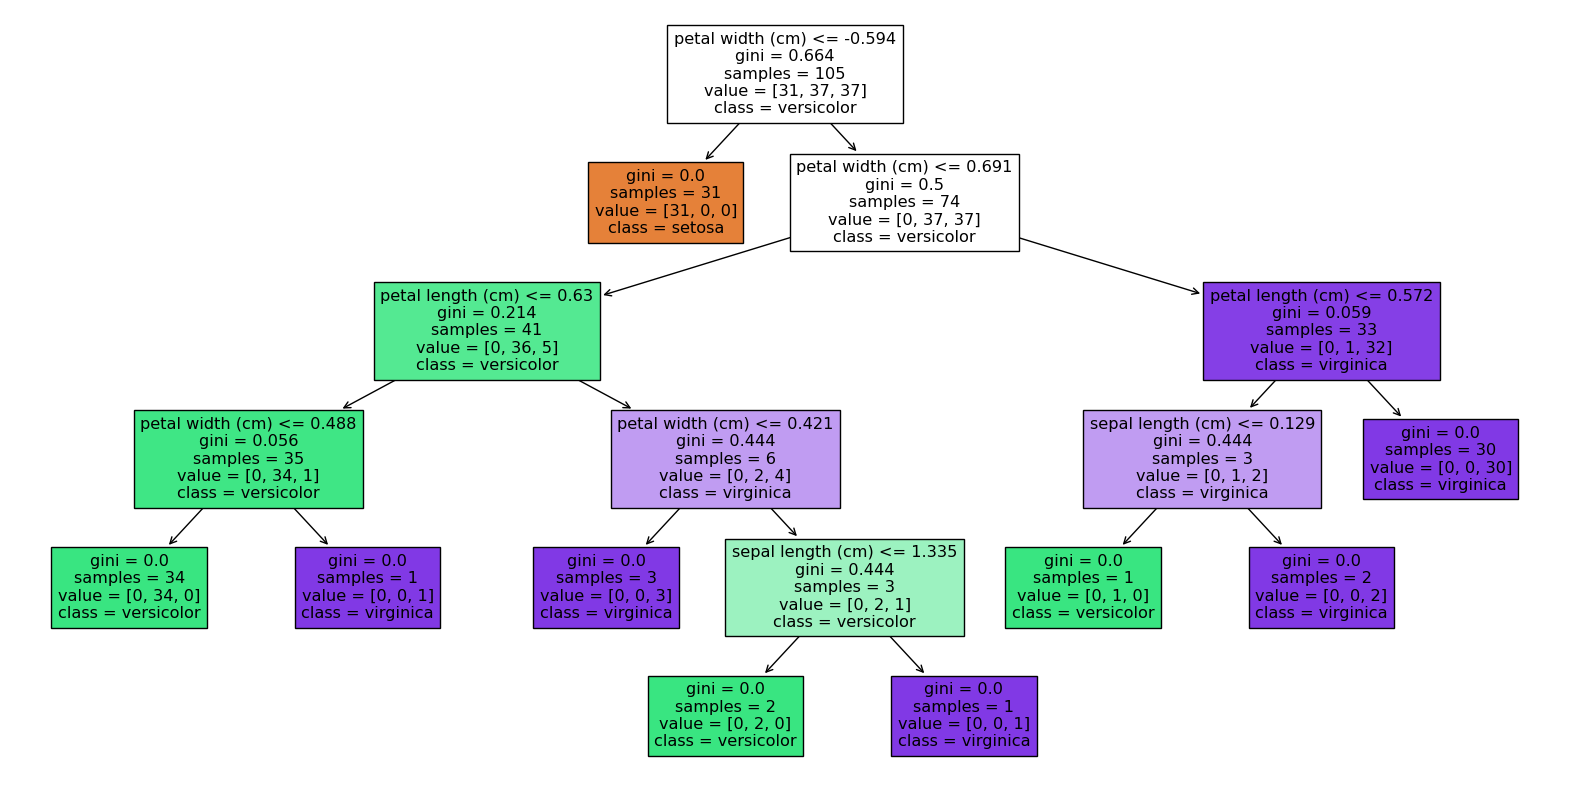

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(arbol, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

# EJEMPLO StandardScaler + LogisticRegression

In [10]:
import pandas as pd
import numpy as np

In [11]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [12]:
# Definición de los pasos a realizar.
steps=[("standard_scaler", StandardScaler()),
       ("classifier", LogisticRegression())
       ]

In [13]:
steps

[('standard_scaler', StandardScaler()), ('classifier', LogisticRegression())]

In [14]:
# Se crea el objeto pipeline.
pipe = Pipeline(steps)

In [15]:
# visualización del pipeline
from sklearn import set_config

set_config(display="diagram")

In [16]:
pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [17]:
# Crea dataset dinamicamente para probar los pipelines.
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000)

In [18]:
X.shape

(1000, 20)

In [19]:
X

array([[-1.16121774, -0.85404854,  1.25637695, ..., -0.0533994 ,
         0.14520057,  0.72894621],
       [-1.23207862, -1.94397803, -0.64762516, ...,  0.26641658,
        -0.54144008,  0.15069886],
       [ 0.3938763 , -0.33625941, -0.3293368 , ...,  0.55536568,
         1.28969727,  0.25694086],
       ...,
       [-0.5723434 , -0.71061658, -1.15598255, ..., -0.56082653,
         0.15175791, -1.1596657 ],
       [-1.0655016 , -0.24719008,  0.12990983, ...,  1.81802521,
         0.1070837 , -1.39670406],
       [-0.47660526,  0.25635196, -1.81523058, ..., -1.05483217,
         0.27610681,  1.01750469]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [22]:
y_predict = pipe.predict(X_test)

In [23]:
y_predict

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,

# EJEMPLO StandardScaler + PCA + SVC

Standard Scaler, dimensionality reduction, estimation

In [24]:
from sklearn.decomposition import PCA # reduccion de dimensionalidad
from sklearn.svm import SVC

In [25]:
steps=[("scaling", StandardScaler()),
 ("PCA", PCA(n_components=3)),
 ("SVC", SVC())]

In [26]:
pipe2=Pipeline(steps)

In [27]:
pipe2

Pipeline(steps=[('scaling', StandardScaler()), ('PCA', PCA(n_components=3)),
                ('SVC', SVC())])

In [28]:
# Puedo entrenar un componente en particular del pipeline.
pipe2['scaling'].fit_transform(X_train)

array([[ 0.62035928,  0.52935887, -0.56644725, ...,  2.56210183,
        -1.04104234,  1.0531557 ],
       [ 0.75947001,  1.09496485,  0.53219468, ..., -1.05738826,
        -0.19209644, -0.44654848],
       [ 0.71627427, -0.4059053 ,  0.10943581, ..., -0.06604032,
         0.0840911 ,  0.55278195],
       ...,
       [-0.86501351,  0.80676543,  0.68875178, ...,  0.44297445,
        -0.06433301, -0.22410044],
       [ 0.92471776, -1.91167752,  0.5395536 , ..., -2.05872567,
         0.48587222,  0.53302657],
       [ 1.39768587, -1.71266836,  1.04250115, ..., -1.25293392,
         1.10453839, -1.02982062]])

In [29]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('PCA', PCA(n_components=3)),
                ('SVC', SVC())])

In [30]:
pipe2.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,

# Transformers

Crear diferentes pilelines y despues convinarlos

In [31]:
from sklearn.impute import SimpleImputer


In [32]:
# Pipeline numerico
numeric_processor=Pipeline(
    steps=[("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean"))
    , ("scaler", StandardScaler())]
)

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Categorical processing pipeline
categorical_processor=Pipeline(
    steps=[("imputation_constant", SimpleImputer(fill_value="missing", strategy="constant"))
    , ("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

In [34]:
categorical_processor

Pipeline(steps=[('imputation_constant',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [35]:
## combine processing technqiues
from sklearn.compose import ColumnTransformer

In [36]:
preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,["gender","City"]),
    ("numerical",numeric_processor,["age","height"])]
)

In [37]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'City']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'height'])])

In [38]:
from sklearn.pipeline import make_pipeline

In [39]:
pipe=make_pipeline(preprocessor,LogisticRegression())

In [40]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'City']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height'])])),
                ('logisticregression', LogisticRegression())])